In [1]:
import pandas as pd
# Load the datasets
df_hindi = pd.read_csv('../Datasets/WikiMatrix/Processed/clean_en-hi.csv')  # Replace with your file path
df_greek = pd.read_csv('../Datasets/WikiMatrix/Processed/clean_en-el.csv')  # Replace with your file path


In [2]:
df_hindi = df_hindi.sample(100, random_state=11)
df_greek = df_greek.sample(100, random_state=11)

BLEU score for English-to-Hindi: 20.843589062758465
BLEU score for English-to-Greek: 30.178653107941845


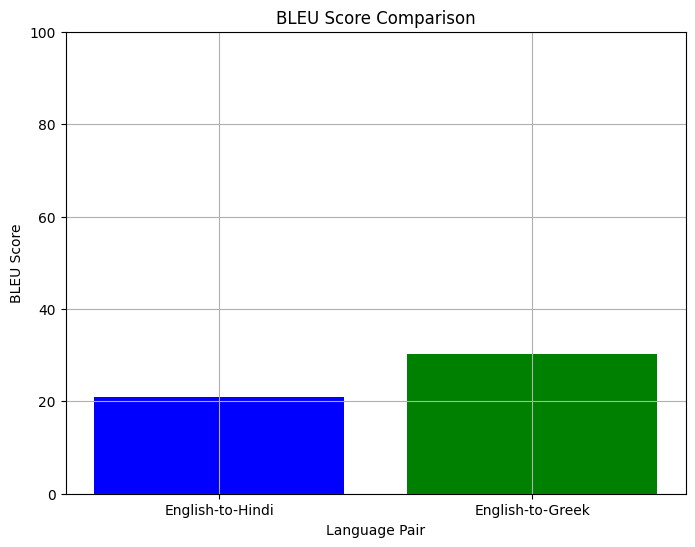

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer
from sacrebleu import corpus_bleu

# # Load the datasets
# df_hindi = pd.read_csv('../Datasets/WikiMatrix/Processed/clean_en-hi.csv')  # Replace with your file path
# df_greek = pd.read_csv('../Datasets/WikiMatrix/Processed/clean_en-el.csv')  # Replace with your file path

# Extract source and target texts
source_texts_hindi = df_hindi['English'].tolist()
target_texts_hindi = df_hindi['Hindi'].tolist()

source_texts_greek = df_greek['English'].tolist()
target_texts_greek = df_greek['Greek'].tolist()

# Load the model and tokenizer
model_name = "facebook/m2m100_418M"  # You can use a larger model if needed
model = M2M100ForConditionalGeneration.from_pretrained(model_name)
tokenizer = M2M100Tokenizer.from_pretrained(model_name)

# Function to calculate BLEU score for a dataset
def calculate_bleu_score(source_texts, target_texts, model, tokenizer, src_lang, target_lang):
    tokenizer.src_lang = src_lang
    translated_texts = []
    for text in source_texts:
        encoded_inputs = tokenizer(text, return_tensors="pt")
        generated_tokens = model.generate(**encoded_inputs, forced_bos_token_id=tokenizer.get_lang_id(target_lang))
        translated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)
        translated_texts.append(translated_text)
    bleu_score = corpus_bleu(translated_texts, [target_texts])
    return bleu_score.score

# Calculate BLEU scores for both datasets
bleu_score_hindi = calculate_bleu_score(source_texts_hindi, target_texts_hindi, model, tokenizer, "en", "hi")
bleu_score_greek = calculate_bleu_score(source_texts_greek, target_texts_greek, model, tokenizer, "en", "el")

print(f"BLEU score for English-to-Hindi: {bleu_score_hindi}")
print(f"BLEU score for English-to-Greek: {bleu_score_greek}")

# Plot the BLEU scores
languages = ['English-to-Hindi', 'English-to-Greek']
bleu_scores = [bleu_score_hindi, bleu_score_greek]

plt.figure(figsize=(8, 6))
plt.bar(languages, bleu_scores, color=['blue', 'green'])
plt.title('BLEU Score Comparison')
plt.xlabel('Language Pair')
plt.ylabel('BLEU Score')
plt.ylim(0, 100)  # BLEU score ranges from 0 to 100
plt.grid(True)
plt.show()